Número óptimo de camiones: 12


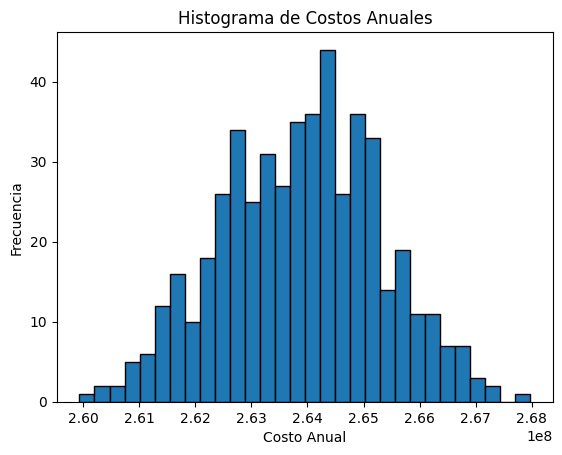

Estadísticas descriptivas de los costos anuales:
Mínimo: 259936050.62723482
Máximo: 267974065.16604286
Media: 263885342.1123145
Mediana: 263957123.24732032
Desviación estándar: 1422939.1611651955
Intervalo de confianza (95%): (263760615.99557978, 264010068.2290492)


In [ ]:
from random import random
import math
from statistics import mean, stdev, median
import matplotlib.pyplot as plt

#Generar una observacion de la uniforme
def uniforme(min,max):
  r = random()
  obs = (max - min)*r + min
  return obs

#Generar una produccion diaria
def produccion():
  r = random()
  if r < 0.1:
    return uniforme(50,55)
  elif r < 0.25:
    return uniforme(55,60)
  elif r < 0.55:
    return uniforme(60,65)
  elif r < 0.9:
    return uniforme(65,70)
  elif r < 0.98:
    return uniforme(70,75)
  else:
    return uniforme(75,80)

#Generar una observacion de la triangular
def triangular(ei,moda,ed):
  a=ei
  b=ed
  c=moda
  r=random()
  r1=(c-a)/(b-a)
  if r <=r1:
    obs=a+math.sqrt(r*(b-a)*(c-a))
  else :
    obs=b-math.sqrt((1-r)*(b-a)*(b-c))
  return(obs)

#Logica de la simulacion
def simulacion(cam):
    costo_camiones = cam * 20000000
    costo_total = costo_camiones  # Costo inicial de comprar camiones

    for i in range(250):
        prod = produccion()
        carga_camiones = 0

        # Calcular la cantidad de producto que se puede transportar con los camiones disponibles
        for j in range(cam):
            carga_camiones += triangular(4, 5, 6)

        # Si la producción supera la capacidad de los camiones
        if prod > carga_camiones:
            excedente = prod - carga_camiones
            # Costo de enviar el excedente a través de camiones de otra compañía transportadora
            costo_excedente = excedente * 20000
            costo_total += costo_excedente

    return costo_total

# Determinar el número óptimo de camiones que minimiza los costos anuales promedio
costos_promedio = []
for nro in range(8, 19):
    costos_simulacion = [simulacion(nro) for _ in range(500)]
    costo_promedio = mean(costos_simulacion)
    costos_promedio.append((nro, costo_promedio))

# Ordenar los costos promedio y encontrar el mínimo
costos_promedio.sort(key=lambda x: x[1])
optimo_camiones = costos_promedio[0][0]
print("Número óptimo de camiones:", optimo_camiones)

# Realizar histograma de los costos anuales
costos_optimos = [simulacion(optimo_camiones) for _ in range(500)]
plt.hist(costos_optimos, bins=30, edgecolor='black')
plt.title('Histograma de Costos Anuales')
plt.xlabel('Costo Anual')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas
print("Estadísticas descriptivas de los costos anuales:")
print("Mínimo:", min(costos_optimos))
print("Máximo:", max(costos_optimos))
print("Media:", mean(costos_optimos))
print("Mediana:", median(costos_optimos))
print("Desviación estándar:", stdev(costos_optimos))

# Intervalo de confianza para el promedio de los costos
n = len(costos_optimos)
mean_costos = mean(costos_optimos)
std_dev = stdev(costos_optimos)
ci = 1.96 * (std_dev / math.sqrt(n))
lower_bound = mean_costos - ci
upper_bound = mean_costos + ci
print("Intervalo de confianza (95%):", (lower_bound, upper_bound))


El costo anual promedio es más bajo cuando la empresa compra y opera con 12 camiones. Esto puede interpretarse de varias maneras:

Eficiencia en la capacidad de transporte: Con 12 camiones, la capacidad de transporte parece ser suficiente para manejar la producción diaria y minimizar los costos asociados con el envío de excedentes.

Balance entre costo de compra y operación: A pesar del costo inicial de comprar 12 camiones, los ahorros resultantes en términos de costos de transporte y envío de excedentes hacen que la opción de tener 12 camiones sea la más rentable a largo plazo.

Optimización de recursos: Comprar más de 12 camiones podría resultar en gastos innecesarios, ya que no proporcionaría beneficios adicionales significativos en términos de reducción de costos. Por otro lado, comprar menos de 12 camiones podría resultar en una capacidad de transporte insuficiente y mayores costos de envío de excedentes.

El número óptimo de camiones, en este caso 12, representa un equilibrio entre los costos de adquisición y operación de los camiones, y los ahorros en términos de costos de transporte y envío de excedentes.

Mínimo: El costo mínimo anual registrado en las simulaciones fue de aproximadamente 259.94 millones de pesos. Esto representa el costo más bajo que la empresa experimentó en cualquier simulación.

Máximo: El costo máximo anual registrado en las simulaciones fue de alrededor de 267.97 millones de pesos. Esto indica el costo más alto que la empresa podría enfrentar en un año de operaciones.

Media: La media de los costos anuales fue de aproximadamente 263.89 millones de pesos. Esta es la suma de todos los costos anuales dividida por el número total de simulaciones realizadas.

Mediana: La mediana de los costos anuales fue de aproximadamente 263.96 millones de pesos. Esto significa que el 50% de los costos anuales están por encima de este valor y el 50% están por debajo.

Desviación estándar: La desviación estándar de los costos anuales fue de alrededor de 1.42 millones de pesos. Esto indica la dispersión o variabilidad de los costos anuales alrededor de la media.